In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint

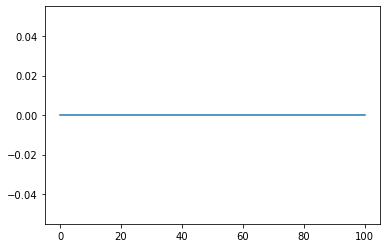

In [14]:
q=72                                        #number of surface capsomers
Ccmc=0.2*10**(-6)                           #critical concentration,mole
alpha=2                                     #line energy, kT 
beta=70*10**(6)                             #rate of attachment, Hz/meter
c1t0=10.0*10**(-6)                          #initial concentration, mole
Rh=0.619*10**(-6)                           #hydrodynamic radius, meter, estimated for 300 amino acid protein
R=np.sqrt(q)*Rh/2                           #estimate for spherical capsid radius
T=293                                       #room temp, K
k=1.38064852*10**(-23)                      #boltzmann constant
Z= 0.9544*10**(-3)                          #viscosity room temp water, pascals
D1=k*T/(6*np.pi*Rh*Z)                       #diffusion coefficient
j=D1*2*R/q                                  #simplification constant

initCn= [0]*q                               #empty conditions
initCn[0]=c1t0                              #adding initial concentration of subunits

t=np.linspace(0,100,101)                    #time values

def Jn(n,C1,Cn,Cnp1):                       #net current ofp artial capdisds of size n growing to n+1
    J=C1*j*np.sqrt(n*(q-n))*(Cn-Cnp1*Ccmc/(C1*2)*np.exp(alpha*(np.sqrt((n+1)*(q-n-1))-np.sqrt(n*(q-n)))))
    return(J)

dcdt=[0]                                    #initializes dcdt
def Con(Cn,t):                              #function builds dcdt ode list of size q   
    i=1                                     #dummy index
    dcdt=[0]*q                              #intializes q size list of zeros
    dcdt[0]=-Jn(1,Cn[0],Cn[0],Cn[1])        #finds first dcdt element 
    i=1                                     #dummy index
    while i < q:#goes from 1 to q-1 indices #builds list 
        n=i+1
        if n == q:                          #final list element index q-1
            dcdt[i]=(Jn(q-1,Cn[0],Cn[i],0)) 
            
        else:                               #elements of index 1 to q-2
            dcdt[i]=(Jn(i,Cn[0],Cn[i-1],Cn[i])-Jn(n,Cn[0],Cn[i],Cn[n]))
        i+=1
    return(dcdt)

x=odeint(Con,initCn,t)                       #integratesgives txq matrix of concetrations at each time step
Cq= x[:,q-1]                                 #concentration of complete capsids as a function of time

plt.plot(t,Cq)
plt.show()